In [ ]:
#wczytaj plik Iris.csv

In [11]:
import pandas as pd

df = pd.read_csv('Iris.csv')

In [12]:
#wyświetl cały plik

In [13]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
#wyświetl podsumowanie ostatniej kolumny

In [16]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [17]:
import numpy as np

data = np.asarray(df) #zamiana dataframe na array

X = data[:,1:5] #tworzenie zmiennej, która zawiera dane (pomiary
y = data[:,5] #tworzenie zmiennej, która zawiera etykiety (Species)
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2) #podział na dane treningowe i testowe 
# 20% całego zbioru to dane testowe; takie, których on nigdy wcześniej nie widział

model = SVC(kernel = 'linear') #stworzenie klasyfikatora
#kernel - sposób dzielenia danych 

model.fit(X_train, y_train) #trenowanie klasyfikatora - linijka odpowiedzialna za uczenie

y_pred = model.predict(X_test) #predykcja na danych testowych
#predykcja - mamy wyuczony model i dajemy mu nowe dane; on przyporządkowuje etykiety do danych 

acc = accuracy_score(y_test, y_pred) #policzenie accuracy; czy właściwe etykiety zgadzają się z jego predykcją
print(acc)
#sprawdzić różne  i test size

1.0


In [33]:
#tworzymy z tego funkcję, która zwraca acc; dokonuje podziału danych, uczenia klasyfikatora dla określoych danych 
#random_state - wyłączamy losowość, ustawiamy sobie parametry startowe
def clasification (X, y, kernel, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state = 42)
    model = SVC(kernel = kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [34]:
train_size = [0.2, 0.4, 0.6, 0.8]
kernels = ["linear", "poly", "rbf"]
for kernel in kernels:
    for size in train_size:
        print(kernel, size, clasification (X, y, kernel, size))

linear 0.2 0.975
linear 0.4 0.9888888888888889
linear 0.6 1.0
linear 0.8 1.0
poly 0.2 0.9833333333333333
poly 0.4 0.9888888888888889
poly 0.6 1.0
poly 0.8 1.0
rbf 0.2 0.9333333333333333
rbf 0.4 0.9777777777777777
rbf 0.6 1.0
rbf 0.8 1.0


z wyników wychodzi, ze kernel wielomianowy (poly) radzi sobie najlepiej

and now wykresiki

In [36]:
import matplotlib.pyplot as plt

[0.975, 0.9888888888888889, 1.0, 1.0, 0.9833333333333333, 0.9888888888888889, 1.0, 1.0, 0.9333333333333333, 0.9777777777777777, 1.0, 1.0]
[0.9833333333333333, 0.9888888888888889, 1.0, 1.0]


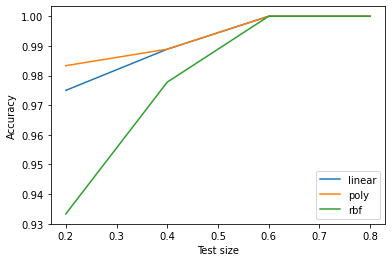

In [62]:
test_size = [0.2, 0.4, 0.6, 0.8]
kernels = ["linear", "poly", "rbf"]

acc = []
for kernel in kernels:
    for size in test_size:
        acc.append(clasification(X, y, kernel, size))

print (acc)
print(acc[4:8])
plt.plot(test_size, acc[:4], label = 'linear')
plt.plot(test_size, acc[4:8], label = 'poly')
plt.plot(test_size, acc[8:12], label = 'rbf')
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.legend()

który kernel jest lepszy, która kombinacja jest najlepsza, jak podchodzić do wielkości test size 
wszystko w pdf